In [ ]:
import pandas as pd
import torch
import tensorflow as tf
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
df = pd.read_csv("dataset.csv.zip")  # Replace with actual filename
df.head()

,id,file_path,file_size,line_count,extension,language
0,1,Markdown/000001.md,34784,572,md,Markdown
1,2,XML/000002.props,3013,44,props,XML
2,3,Text/000003.txt,1076,21,txt,Text
3,4,Markdown/000004.md,8105,84,md,Markdown
4,5,Markdown/000005.md,2763,41,md,Markdown


 # STEP 2 : Unzip the Code Files

In [ ]:
import zipfile
with zipfile.ZipFile("dataset.zip", "r") as zip_ref:
    zip_ref.extractall("code_files")

# STEP 3 : Read Code from File Paths


In [ ]:
import os

def read_code(path):
    full_path = os.path.join("code_files", path)
    try:
        with open(full_path, "r", encoding="utf-8") as f:
            return f.read()
    except Exception as e:
        return f"ERROR: {e}"

df["code"] = df["file_path"].apply(read_code)

In [ ]:
df

,id,file_path,file_size,line_count,extension,language,code
0,1,Markdown/000001.md,34784,572,md,Markdown,# Contributing\n\n| Component | Bui...
1,2,XML/000002.props,3013,44,props,XML,"﻿<Project ToolsVersion=""15.0"" xmlns=""http://sc..."
2,3,Text/000003.txt,1076,21,txt,Text,The MIT License (MIT)\n\nCopyright (c) 2015 Mi...
3,4,Markdown/000004.md,8105,84,md,Markdown,# Azure SDK for .NET\n\n[![Packages](https://i...
4,5,Markdown/000005.md,2763,41,md,Markdown,<!-- BEGIN MICROSOFT SECURITY.MD V0.0.5 BLOCK ...
...,...,...,...,...,...,...,...
86222,86229,SQL/086229.sql,333,18,sql,SQL,CREATE SCHEMA TestSchema;\nGO\n\nCREATE TABLE ...
86223,86230,SQL/086230.sql,420,8,sql,SQL,"WITH a AS (SELECT * FROM (VALUES(1),(2),(3),(4..."
86224,86231,SQL/086231.sql,333,18,sql,SQL,CREATE SCHEMA TestSchema;\nGO\n\nCREATE TABLE ...
86225,86232,SQL/086232.sql,420,8,sql,SQL,"WITH a AS (SELECT * FROM (VALUES(1),(2),(3),(4..."


In [ ]:
df.loc[1,'code']

'\ufeff<Project ToolsVersion="15.0" xmlns="http://schemas.microsoft.com/developer/msbuild/2003">\n  <PropertyGroup>\n    <RepoRoot>$(MSBuildThisFileDirectory)</RepoRoot>\n    <RepoEngPath>$(MSBuildThisFileDirectory)eng</RepoEngPath>\n    <RepoSrcPath>$(RepoRoot)src</RepoSrcPath>\n    <RepoSdkPath>$(RepoRoot)src/SDKs</RepoSdkPath>\n    <IsLegacyMgmtProject Condition="\'$(IsLegacyMgmtProject)\' == \'\' and $(MSBuildProjectName.Contains(\'.Management.\'))">true</IsLegacyMgmtProject>\n    <ProjectStartsWithStandardName Condition="$(MSBuildProjectName.StartsWith(\'Azure.\')) or $(MSBuildProjectName.StartsWith(\'Microsoft.\'))">true</ProjectStartsWithStandardName>\n    <ImportRepoCommonSettings Condition="\'$(ImportRepoCommonSettings)\' == \'\' and \'$(ProjectStartsWithStandardName)\' == \'true\' and \'$(IsLegacyMgmtProject)\' != \'true\'">true</ImportRepoCommonSettings>\n  </PropertyGroup>\n\n  <!-- Setup default project properties -->\n  <PropertyGroup>\n    <Configuration Condition="\'$(C

In [ ]:
import pandas as pd
df2 = pd.read_csv("data_folder/structured_cleaned_new_dataset.csv")
df2.head()

,id,file_path,file_size,line_count,extension,language,code,clean_code,clean_line_count,clean_size
0,1,Markdown/000001.md,34784,572,md,Markdown,# Contributing\n\n| Component | Bui...,contributing\n\n component build ...,186,10000
1,2,XML/000002.props,3013,44,props,XML,"﻿<Project ToolsVersion=""15.0"" xmlns=""http://sc...",project toolsversion xmlns\n propertygroup\n ...,44,1812
2,3,Text/000003.txt,1076,21,txt,Text,The MIT License (MIT)\n\nCopyright (c) 2015 Mi...,the mit license mit\n\ncopyright c 2015 micros...,21,1026
3,4,Markdown/000004.md,8105,84,md,Markdown,# Azure SDK for .NET\n\n[![Packages](https://i...,azure sdk for net\n\npackageshttpsimgshieldsi...,84,7244
4,5,Markdown/000005.md,2763,41,md,Markdown,<!-- BEGIN MICROSOFT SECURITY.MD V0.0.5 BLOCK ...,begin microsoft securitymd v005 block \n\n se...,41,2523


In [ ]:
df2.loc[1,'clean_code']

'project toolsversion xmlns\n  propertygroup\n    reporootmsbuildthisfiledirectoryreporoot\n    repoengpathmsbuildthisfiledirectoryengrepoengpath\n    reposrcpathreporootsrcreposrcpath\n    reposdkpathreporootsrcsdksreposdkpath\n    islegacymgmtproject conditiontrueislegacymgmtproject\n    projectstartswithstandardname conditiontrueprojectstartswithstandardname\n    importrepocommonsettings conditiontrueimportrepocommonsettings\n  propertygroup\n\n   setup default project properties \n  propertygroup\n    configuration conditiondebugconfiguration\n    platform conditionanycpuplatform\n    platformname conditionplatformplatformname\n  propertygroup\n\n   setup common output paths \n  propertygroup\n    artifactsdir conditionreporootartifactsartifactsdir\n    artifactsobjdirartifactsdirobjartifactsobjdir\n    artifactsbindirartifactsdirbinartifactsbindir\n    artifactspackagesdirartifactsdirpackagesconfigurationartifactspackagesdir\n\n    outdirname conditionmsbuildprojectnameoutdirname\

 # THE CLEAN FUNCTION

In [ ]:
import re
def preprocess_code(text):
        """Clean and preprocess code snippets"""
        if pd.isna(text):
            return ""

        # Convert to lowercase
        text = text.lower()

        # Remove comments
        text = re.sub(r'#.*', '', text)  # Python comments
        text = re.sub(r'//.*', '', text)  # Single-line comments
        text = re.sub(r'/\*.*?\*/', '', text, flags=re.DOTALL)  # Multi-line comments

        # Remove extra whitespace but keep basic structure
        text = re.sub(r'\s+', ' ', text)

        text = text[:10000]



        return text.strip()

In [ ]:
# import re

# def preprocess_code_for_classification(code):
#     """Clean code for classification: remove strings, normalize whitespace, preserve symbols and structure"""
#     if not isinstance(code, str):
#         return ""

#     # Remove string literals (single and double quotes)
#     code = re.sub(r'(["\'])(?:(?=(\\?))\2.)*?\1', '', code)

#     # Normalize tabs and spaces (preserve newlines)
#     code = re.sub(r'[ \t]+', ' ', code)      # Collapse multiple spaces/tabs
#     code = re.sub(r'\n+', '\n', code)        # Collapse multiple newlines

#     # Strip leading/trailing whitespace from each line
#     code = '\n'.join(line.strip() for line in code.splitlines())

#     # Truncate long files (optional)
#     code = code[:10000]

#     return code.strip()

In [ ]:
df["clean_code"] = df["code"].apply(preprocess_code)

In [ ]:
missing = df["clean_code"].isnull().sum()
print(f"Missing code rows: {missing}")

Missing code rows: 0


In [ ]:
df.loc[1,'clean_code']

'\ufeff<project toolsversion="15.0" xmlns="http: <propertygroup> <reporoot>$(msbuildthisfiledirectory)</reporoot> <repoengpath>$(msbuildthisfiledirectory)eng</repoengpath> <reposrcpath>$(reporoot)src</reposrcpath> <reposdkpath>$(reporoot)src/sdks</reposdkpath> <islegacymgmtproject condition="\'$(islegacymgmtproject)\' == \'\' and $(msbuildprojectname.contains(\'.management.\'))">true</islegacymgmtproject> <projectstartswithstandardname condition="$(msbuildprojectname.startswith(\'azure.\')) or $(msbuildprojectname.startswith(\'microsoft.\'))">true</projectstartswithstandardname> <importrepocommonsettings condition="\'$(importrepocommonsettings)\' == \'\' and \'$(projectstartswithstandardname)\' == \'true\' and \'$(islegacymgmtproject)\' != \'true\'">true</importrepocommonsettings> </propertygroup> <!-- setup default project properties --> <propertygroup> <configuration condition="\'$(configuration)\' == \'\'">debug</configuration> <platform condition="\'$(platform)\' == \'\'">anycpu</p

In [ ]:
df["clean_line_count"] = df["clean_code"].apply(lambda x: len(x.splitlines()))
df["clean_size"] = df["clean_code"].apply(lambda x: len(x.encode("utf-8")))

In [ ]:
df

,id,file_path,file_size,line_count,extension,language,code,clean_code,clean_line_count,clean_size
0,1,Markdown/000001.md,34784,572,md,Markdown,# Contributing\n\n| Component | Bui...,| component | build status | | ---------------...,1,9999
1,2,XML/000002.props,3013,44,props,XML,"﻿<Project ToolsVersion=""15.0"" xmlns=""http://sc...","﻿<project toolsversion=""15.0"" xmlns=""http: <pr...",1,2840
2,3,Text/000003.txt,1076,21,txt,Text,The MIT License (MIT)\n\nCopyright (c) 2015 Mi...,the mit license (mit) copyright (c) 2015 micro...,1,1071
3,4,Markdown/000004.md,8105,84,md,Markdown,# Azure SDK for .NET\n\n[![Packages](https://i...,[![packages](https: this repository is for act...,1,3910
4,5,Markdown/000005.md,2763,41,md,Markdown,<!-- BEGIN MICROSOFT SECURITY.MD V0.0.5 BLOCK ...,<!-- begin microsoft security.md v0.0.5 block ...,1,2049
...,...,...,...,...,...,...,...,...,...,...
86222,86229,SQL/086229.sql,333,18,sql,SQL,CREATE SCHEMA TestSchema;\nGO\n\nCREATE TABLE ...,create schema testschema; go create table test...,1,324
86223,86230,SQL/086230.sql,420,8,sql,SQL,"WITH a AS (SELECT * FROM (VALUES(1),(2),(3),(4...","with a as (select * from (values(1),(2),(3),(4...",1,420
86224,86231,SQL/086231.sql,333,18,sql,SQL,CREATE SCHEMA TestSchema;\nGO\n\nCREATE TABLE ...,create schema testschema; go create table test...,1,324
86225,86232,SQL/086232.sql,420,8,sql,SQL,"WITH a AS (SELECT * FROM (VALUES(1),(2),(3),(4...","with a as (select * from (values(1),(2),(3),(4...",1,420


# save file

In [ ]:
df.to_csv("clean_dataset2.csv", index=False)

In [ ]:
from IPython.display import FileLink

FileLink("clean_dataset2.csv")

C:\Users\slima\NLP\NLP_projct_1\notebooks\clean_dataset2.csv

In [ ]:
print("Rows:", len(df))
print("\nLanguage distribution:\n", df["language"].value_counts())

Rows: 86227

Language distribution:
 language
Dart           15345
Rust           14128
C#             10000
Go              9124
JSON            5570
               ...  
Emacs Lisp         2
AppleScript        1
SAS                1
Yacc               1
AsciiDoc           1
Name: count, Length: 77, dtype: int64


In [ ]:
import pandas as pd
print(pd.__version__)

In [ ]:
def downsample_dataframe(df, label_col="language", target_size=5000, enable=True):
    if not enable:
        return df

    def sample_group(group):
        # Downsample only if group size exceeds target
        if len(group) > target_size:
            return group.sample(n=target_size, random_state=1)
        else:
            return group  # Keep all samples if below threshold

    # Apply sampling per group and reset index
    return (
        df.groupby(label_col, group_keys=False)
          .apply(sample_group)
          .reset_index(drop=True)
    )

In [ ]:
df = downsample_dataframe(df, label_col="language", target_size=5000, enable=True)

C:\Users\slima\AppData\Local\Temp\ipykernel_11072\1296311975.py:15: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(sample_group)


In [ ]:
print(df["language"].value_counts())

language
C#             5000
JSON           5000
Kotlin         5000
Go             5000
Dart           5000
               ... 
Emacs Lisp        2
AppleScript       1
AsciiDoc          1
SAS               1
Yacc              1
Name: count, Length: 77, dtype: int64


In [ ]:
min_count = 10  # threshold
counts = df["language"].value_counts()

df["language"] = df["language"].apply(
    lambda x: x if counts[x] >= min_count else "Other"
)

print(df["language"].value_counts())

language
C#            5000
Dart          5000
Go            5000
JSON          5000
Kotlin        5000
              ... 
LLVM            12
RDoc            11
Pascal          11
SourcePawn      11
Gradle          10
Name: count, Length: 61, dtype: int64


In [ ]:
other_count = (df["language"] == "Other").sum()
print("Number of code snippets in the otherclass:", other_count)


Number of code snippets in the otherclass: 43


In [ ]:
df

,id,file_path,file_size,line_count,extension,language,code,clean_code,clean_line_count,clean_size
0,47310,AppleScript/047310.applescript,215,4,applescript,Other,set RootPath to (path to me)\nset JuliaPath to...,set rootpath to (path to me) set juliapath to ...,1,214
1,82833,AsciiDoc/082833.adoc,401,11,adoc,Other,// Copyright (c) 2016-2020 The Khronos Group I...,= code of conduct a reminder that this issue t...,1,226
2,56575,Assembly/056575.asm,703,45,asm,Assembly,title 2 dimensional array\n\n.model small\n.st...,title 2 dimensional array .model small .stack ...,1,517
3,56576,Assembly/056576.asm,1200,59,asm,Assembly,;smallest of three numbers\n.model small\n.sta...,;smallest of three numbers .model small .stack...,1,908
4,56577,Assembly/056577.asm,844,30,asm,Assembly,title Display ASCII binary (BIN.ASM)\n\n; Th...,title display ascii binary (bin.asm) ; this pr...,1,546
...,...,...,...,...,...,...,...,...,...,...
56714,64357,YAML/064357.yml,712,41,yml,YAML,image: Visual Studio 2017\n\n# Fix line ending...,image: visual studio 2017 init: - git config -...,1,477
56715,64368,YAML/064368.yml,18700,549,yml,YAML,version: 2.1\n\naliases:\n - &docker\n - i...,version: 2.1 aliases: - &docker - image: cimg/...,1,10000
56716,64893,YAML/064893.yml,1519,57,yml,YAML,# Javascript Node CircleCI 2.0 configuration f...,version: 2 jobs: build: docker: - image: circl...,1,726
56717,82778,YAML/082778.yml,189,10,yml,YAML,# https://docs.travis-ci.com/user/languages/sc...,os: linux dist: xenial language: scala scala: ...,1,71


In [ ]:
print(df["language"].value_counts())


language
C#            5000
Dart          5000
Go            5000
JSON          5000
Kotlin        5000
              ... 
LLVM            12
RDoc            11
Pascal          11
SourcePawn      11
Gradle          10
Name: count, Length: 61, dtype: int64


In [ ]:
class_counts = df['language'].value_counts()
print(class_counts)

language
C#            5000
Dart          5000
Go            5000
JSON          5000
Rust          5000
              ... 
LLVM            12
RDoc            11
Pascal          11
SourcePawn      11
Gradle          10
Name: count, Length: 61, dtype: int64


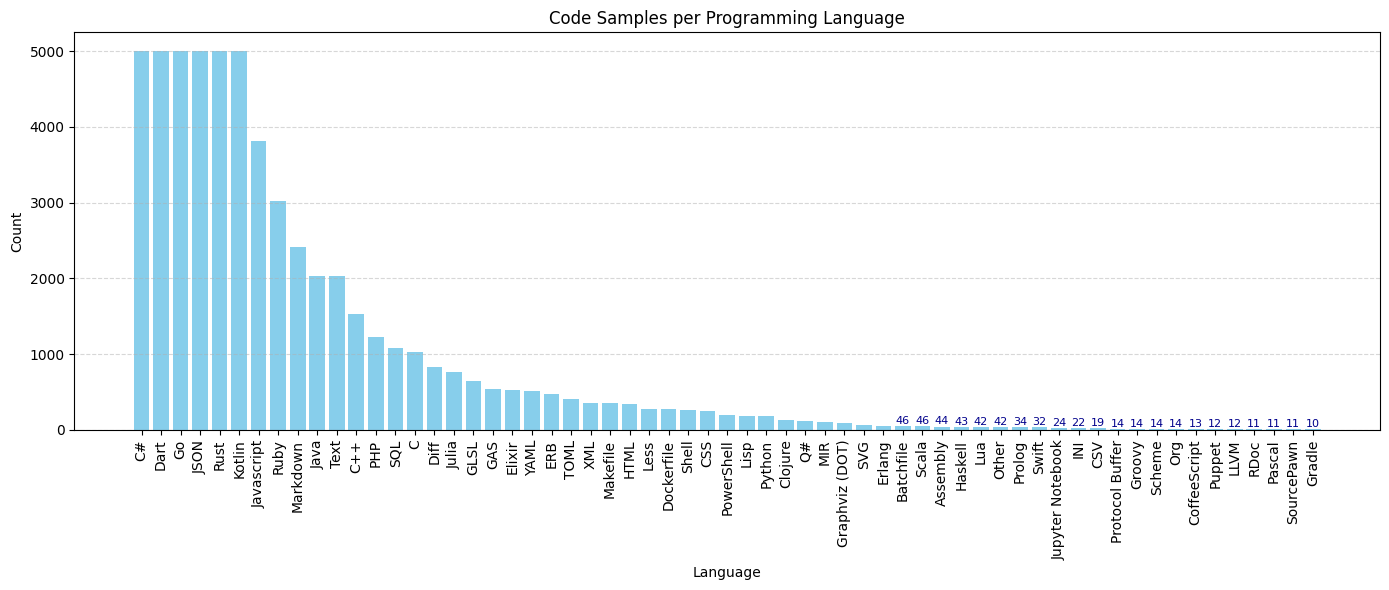

In [ ]:
import matplotlib.pyplot as plt

# Sort by count to make small values easier to spot
class_counts_sorted = class_counts.sort_values(ascending=False)

plt.figure(figsize=(14, 6))
bars = plt.bar(class_counts_sorted.index, class_counts_sorted.values, color='skyblue')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Add value labels on top of each bar (especially useful for small values)
for bar in bars:
    height = bar.get_height()
    if height < 50:  # Only label small values to reduce clutter
        plt.text(bar.get_x() + bar.get_width()/2, height + 1, str(height),
                 ha='center', va='bottom', fontsize=8, color='darkblue')

plt.title("Code Samples per Programming Language")
plt.ylabel("Count")
plt.xlabel("Language")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [ ]:
print(df.isnull().sum())

# Check how many rows in total have any missing value
print("Rows with missing values:", df.isnull().any(axis=1).sum())


id                  0
file_path           0
file_size           0
line_count          0
extension           0
language            0
code                0
clean_code          0
clean_line_count    0
clean_size          0
dtype: int64
Rows with missing values: 0


# start implimenting the linear SVM model

#  spliting data

In [ ]:
from sklearn.model_selection import train_test_split

# Features (X) and labels (y)
X = df["clean_code"].values   # normalized code for ML models
y = df["language"].values    # target labels

# Step 1: Split into Train (70%) and Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.30,          # 30% goes to temp
    random_state=42,         # ensures reproducibility
    stratify=y               # keeps class proportions balanced
)

# Step 2: Split Temp into Validation (15%) and Test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,          # half of 30% = 15%
    random_state=42,
    stratify=y_temp
)

print("Train size:", len(X_train))
print("Validation size:", len(X_val))
print("Test size:", len(X_test))

Train size: 39664
Validation size: 8499
Test size: 8500


# TF-IDF vectorization with char n garms

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Character n-grams are strong for language ID, capturing syntax and punctuation patterns
tfidf = TfidfVectorizer(
    analyzer="char",
    ngram_range=(3, 5),      # tri-grams to penta-grams
    min_df=2,                # ignore very rare n-grams
    lowercase=False,         # preserve case (useful for languages)
    max_features=200_000     # cap features to control memory
)

X_train_vec = tfidf.fit_transform(X_train)
X_val_vec   = tfidf.transform(X_val)
X_test_vec  = tfidf.transform(X_test)

print("Vectorized shapes:", X_train_vec.shape, X_val_vec.shape, X_test_vec.shape)

Vectorized shapes: (39664, 200000) (8499, 200000) (8500, 200000)


# the linear svm model

In [ ]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC(
    C=1.0,
    max_iter=3000,
    class_weight="balanced",
    dual=False,
    random_state=42
)
svm_model.fit(X_train_vec, y_train)


,penalty,'l2'
,loss,'squared_hinge'
,dual,False
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,verbose,0
,random_state,42


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Validation performance
y_val_pred = svm_model.predict(X_val_vec)
print("Val Accuracy:", accuracy_score(y_val, y_val_pred))
print("Val Macro F1:", f1_score(y_val, y_val_pred, average="macro"))
print("\nClassification report (val):\n", classification_report(y_val, y_val_pred))

Val Accuracy: 0.9758795152370867
Val Macro F1: 0.9352433392149818

Classification report (val):
                   precision    recall  f1-score   support

        Assembly       1.00      1.00      1.00         7
       Batchfile       1.00      0.86      0.92         7
               C       0.74      0.75      0.75       154
              C#       0.99      1.00      1.00       750
             C++       0.86      0.82      0.84       230
             CSS       0.44      0.92      0.59        38
             CSV       1.00      1.00      1.00         3
         Clojure       0.95      0.95      0.95        19
    CoffeeScript       1.00      1.00      1.00         2
            Dart       1.00      0.99      0.99       750
            Diff       0.98      0.99      0.98       125
      Dockerfile       1.00      1.00      1.00        40
             ERB       0.96      0.92      0.94        71
          Elixir       0.99      0.96      0.97        79
          Erlang       1.00     

# last step evaluat on test set with visualization

In [ ]:
from scipy.sparse import vstack

X_train_val_vec = vstack([X_train_vec, X_val_vec])
y_train_val = np.concatenate([y_train, y_val])

In [ ]:
Final_svm_model = svm_model # herer since we didn't change any parameter the final svm model is the same so we just need to train it on both train and validation and then use the test
svm_model.fit(X_train_vec, y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,False
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,verbose,0
,random_state,42


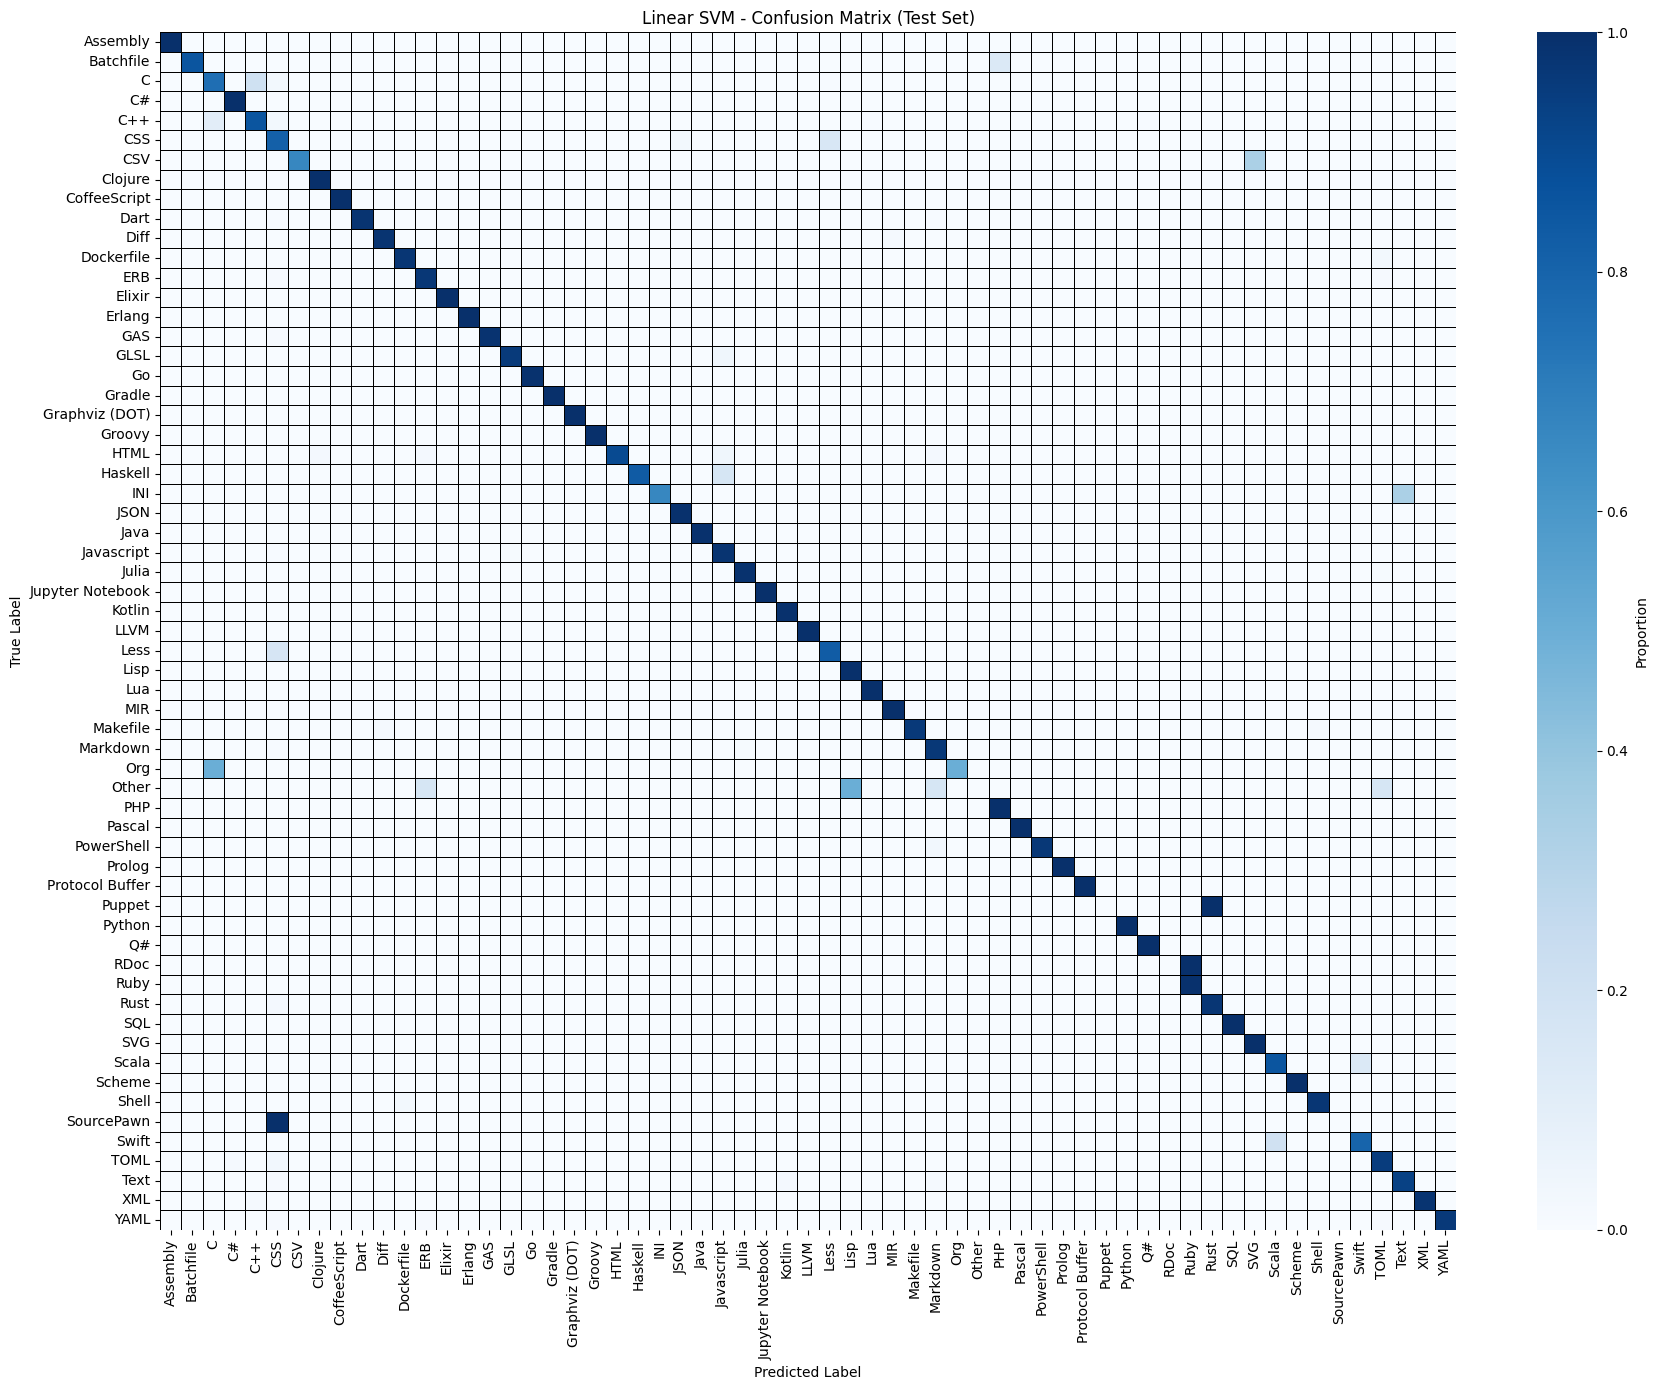

Top n-grams for class: Assembly
[('v a', np.float64(0.6121351390072777)), ('h ;', np.float64(0.6338915318781337)), ('----', np.float64(0.6475583676595812)), (' cx', np.float64(0.6618512525291383)), ('-----', np.float64(0.7406521183027206)), ('ov a', np.float64(0.7448688020392545)), ('mov a', np.float64(0.7607153774729856)), (' mov', np.float64(0.7698027183216679)), ('ov ', np.float64(1.0497523079225812)), ('mov ', np.float64(1.34426395951487)), (' mov ', np.float64(1.40256965572631)), (' ; ', np.float64(1.6798634516409396))]
----------------------------------------
Top n-grams for class: Batchfile
[('echo ', np.float64(0.6540540904806094)), ('@echo', np.float64(0.7274343779991251)), ('@ech', np.float64(0.7274343779991251)), ('@ec', np.float64(0.7274343779991251)), ('rem ', np.float64(0.7562058034851333)), ('echo', np.float64(0.7952623826065442)), (' :: ', np.float64(0.8069777547380047)), (' "%', np.float64(0.8601482190916039)), ('____', np.float64(0.87561680471085)), (' rem ', np.float

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_test_pred = svm_model.predict(X_test_vec)
# Confusion matrix

cm = confusion_matrix(y_test,y_test_pred)
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(18, 14))
sns.heatmap(cm_norm, annot=False, cmap="Blues",
            xticklabels=svm_model.classes_,
            yticklabels=svm_model.classes_,
            linewidths=0.5, linecolor='black',
            cbar_kws={'label': 'Proportion'})

plt.title("Linear SVM - Confusion Matrix (Test Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Top character n-grams per class (explainability)
import numpy as np

def top_ngrams(vectorizer, clf, class_name, top=10):
    class_idx = list(clf.classes_).index(class_name)
    top_ids = np.argsort(clf.coef_[class_idx])[-top:]
    top_ngrams = vectorizer.get_feature_names_out()[top_ids]
    top_weights = clf.coef_[class_idx][top_ids]
    return list(zip(top_ngrams, top_weights))


for cls in svm_model.classes_[:5]:
    print(f"Top n-grams for class: {cls}")
    print(top_ngrams(tfidf, svm_model, cls, top=12))
    print("-" * 40)

In [ ]:
# Example mini snippets per language (short but distinctive)
text = [
    ("Assembly", "section .v  a v a v a  vaa va data ms h g db 'Hello', -------0 section .text global _start _start: mov rax,1 mov rdi,1 mov rsi,msg mov rdx,5 syscall-----------"),
    ("C#", "using System; using using using class Program { static void Main() { Console.WriteLine('Hello World'); } }"),
    ("C++", "#include cout cout <iostream> using namespace std; int main() { cout << 'Hello World' << endl; return 0; }"),
    ("Python", "import sys def main(): print('Hello World') if __name__ == '__main__': main()"),
    ("JavaScript", "function hello() { console.log('Hello World'); } hello();"),
    ("HTML", "<!DOCTYPE html><html><head><title>Hello</title></head><body><h1>Hello World</h1></body></html>"),
    ("Swift", "import Foundation print('Hello World')")
]

import re

def preprocess_code(text):
        """Clean and preprocess code snippets"""
        if pd.isna(text):
            return ""

        # Convert to lowercase
        text = text.lower()

        # Remove comments
        text = re.sub(r'#.*', '', text)  # Python comments
        text = re.sub(r'//.*', '', text)  # Single-line comments
        text = re.sub(r'/\*.*?\*/', '', text, flags=re.DOTALL)  # Multi-line comments

        # Remove extra whitespace but keep basic structure
        text = re.sub(r'\s+', ' ', text)

        text = text[:10000]



        return text.strip()



texts_cleaned = [preprocess_code(code) for code, label in text]
X_manual = tfidf.transform(texts_cleaned)
pred_labels = svm_model.predict(X_manual)

gold_labels = ['Assembly','C#','Python','JavaScript','C++','HTML','Swift']

for true_lbl, pred_lbl in zip(gold_labels, pred_labels):
    print(f"True: {true_lbl:<10} Predicted: {pred_lbl}")

True: Assembly   Predicted: C#
True: C#         Predicted: CSS
True: Python     Predicted: CSS
True: JavaScript Predicted: Makefile
True: C++        Predicted: Markdown
True: HTML       Predicted: ERB
True: Swift      Predicted: CSS


In [ ]:
from sklearn.metrics import precision_score , recall_score

svscores = {
    "accuracy": accuracy_score(y_test, y_test_pred),
    "precision": precision_score(y_test, y_test_pred, average="macro"),
    "recall": recall_score(y_test, y_test_pred, average="macro"),
    "f1": f1_score(y_test, y_test_pred, average="macro")
}

C:\Users\slima\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [ ]:
print("Model Performance:")
for metric, value in scores.items():
    print(f"{metric.capitalize()}: {value:.3f}")

Model Performance:
Accuracy: 0.974
Precision: 0.877
Recall: 0.882
F1: 0.874
